<a href="https://colab.research.google.com/github/bncolorado/Processing-ELTeC-corpus/blob/main/COLAB_notebooks/ELTeC_ExtractAuthorGenderFromSeveralCollections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting author and gender from several ELTeC collections

Borja Navarro Colorado | University of Alicante

This notebook is similar to the previous one, but in this case we will extract information from two ELTeC collections.

## Download and extracting files

The idea is to put all novels (from two or more collection) in a single folder, in a such way that we can iterate over this single folder.

Three steps:

1. Download from GitHub and extract the complete collection in Google Drive
2. Repeat for each collection
3. Copy (or move) all the novels from the level 1 of each collection to a single directory
4. Delete the remaining files of each collection because we will do not use them.


### Download and extracting files fom ELTeC-SPA

In [ ]:
import zipfile

!wget "https://github.com/COST-ELTeC/ELTeC-spa/archive/refs/heads/master.zip" # paste here corpus url

zip_ref = zipfile.ZipFile('master.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts files here (/content/)
zip_ref.close() 
!rm master.zip #Removes ZIP to save space

### Download and extracting files fom ELTeC-ENG

The same process as above, but with the ZIP file of ELTeC-ENG collection.

This process could be repeted for more collections. In this case we will use only two collections.

In [ ]:
!wget "https://github.com/COST-ELTeC/ELTeC-eng/archive/refs/heads/master.zip" # paste here corpus url

zip_ref = zipfile.ZipFile('master.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts files here (/content/)
zip_ref.close()
!rm master.zip #Removes ZIP to save space

### Moving files to a new folder

In [ ]:

!mkdir ENG_SPA_collection #Creates a new folder to save here the novels (all).
!mv /content/ELTeC-eng-master/level1/*.xml /content/ENG_SPA_collection #Moves files from ENG collection
!mv /content/ELTeC-spa-master/level1/*.xml /content/ENG_SPA_collection #Moves files from SPA collection


Finally, let's delete the remaining files of each collection (level 0, 2, etc.) to save space:

In [ ]:
!rm -r /content/ELTeC-eng-master/
!rm -r /content/ELTeC-spa-master/

Now we have all the English and Spanish novels in the same folder ("ENG_SPA_collection"). This way we can proceed to extract the information as in the previous notebook. 

# Open each file and extract information about author and gender

In [ ]:
import os
from google.colab import files
from bs4 import BeautifulSoup

dir_in = "/content/ENG_SPA_collection/"

females = []
males = []

for base, directorios, ficheros in os.walk(dir_in): #Go through directory and open file one by one
  for fichero in ficheros:
    ficheroEntrada = base + fichero
    with open(ficheroEntrada, 'r') as tei:
      soup = BeautifulSoup(tei, 'xml')
      print("Processing", fichero)
      author = soup.author.text # Extract author
      gender = soup.authorGender["key"] # Extract gender
      if gender == 'F':
        if author not in females: 
          females.append(author) #stores the information
          
      elif gender == 'M':
        if author not in males:
          males.append(author)  #stores the information

results = [len(females), len(males)] #Count number of female and male authors.
total = len(females) + len(males) 
print("Results:\n\tFemale: "+str(len(females))+"\n\tMale: "+str(len(males))+"\n\tTOTAL: "+str(total))

females_out = ''
males_out = ''

for item in females: # to string to save in a file
  females_out+=item+'\n'
for item in males:
  males_out+=item+'\n'

outF = open('author_females.txt', 'w') #Opens a file in write mode ("w").
outM = open('author_males.txt', 'w') #Opens a file in write mode ("w").
outF.write(females_out) # "Writes" the content of the "females_out" variable (string) in the file.
outF.close() #Closes the file
outM.write(males_out) # "Writes" the content of the "males_out" variable (string) in the file.
outM.close() #Closes the file.

files.download('author_females.txt')
files.download('author_males.txt')


## Plotting

In this case the plot shows the percentage.


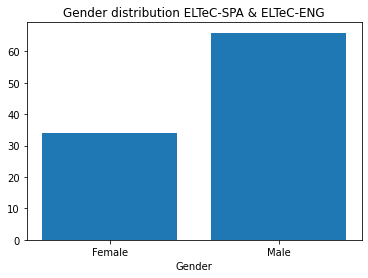

34.074074074074076% | 65.92592592592592% | N=100.0


In [ ]:
import matplotlib.pyplot as plt

data = [(len(females)*100/total), (len(males)*100/total)]
N = data[0]+data[1]
x = ['Female', 'Male'] 
y = data #results #data
plt.bar(x,y) #Creates the plot
plt.xlabel('Gender')
plt.title('Gender distribution ELTeC-SPA & ELTeC-ENG')
plt.show()
print(str(data[0])+"% | "+str(data[1])+"% | N="+str(N))